In [1]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
JSON_DATA_PATH = '{}/data/json/'.format(MAIN_PATH)
CSV_DATA_PATH = '{}/data/csv/'.format(MAIN_PATH)

In [2]:
import sys
sys.path.insert(0, MAIN_PATH)

In [10]:
%load_ext autoreload
%autoreload 2
from scripts.models.ltr_svm_tf.train import LTRSVMTFTrain
from scripts.models.ltr_svm_tf.metrics import LTRSVMTFMetrics

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Entrenamiento

In [4]:
ltr_params = {
    'mode': 'tfidf',
    'count_vec_kwargs': {'ngram_range': (1, 2), 'strip_accents': 'unicode'},
    'target_metric': 'rouge',
    'metric_params': {'rouge_mode': 'rouge-1', 'rouge_metric': 'r'},
    'drop_teams': True,
    'lemma': True,
    'train_perc': 0.7,
    'val_perc': 0.2
}

model_params = {}

In [5]:
ltr_train = LTRSVMTFTrain(model_params=model_params, ltr_params=ltr_params)

Setting target metric to rouge
Setting mode to tfidf


In [ ]:
%%time
ltr_train.train()

Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/98a1222ae6
Training model...


## Salida

In [6]:
model = ltr_train.read_model()

In [7]:
model

Pipeline(steps=[('model', SVR())])

In [8]:
model_info = ltr_train.read_model_info()

In [9]:
model_info

{'best_score': None, 'best_params': None, 'model_out': None}

## Métricas

In [13]:
ltr_metrics = LTRSVMTFMetrics(ltr_train)

In [14]:
ltr_metrics.run()

Computing metric for validation dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/e54c577da8/validation_metrics.pickle
Computing metric for test dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/e54c577da8/test_metrics.pickle


Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/e54c577da8/train_metrics.pickle
mse : 0.010412475691262493
mae : 0.07792907015382874
r2 : 0.4367481009227022


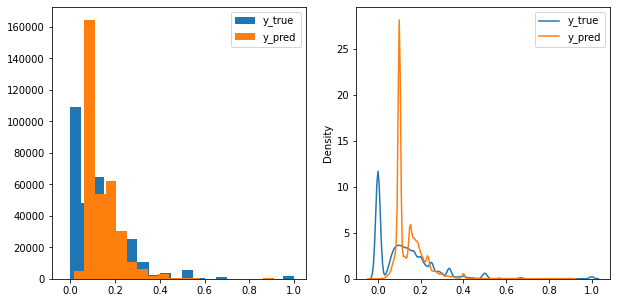

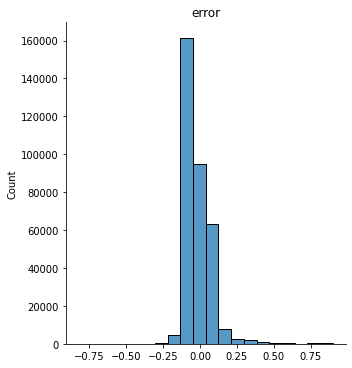

In [15]:
ltr_metrics.show_metrics('train')

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/e54c577da8/validation_metrics.pickle
mse : 0.014940275358694013
mae : 0.08913064650511741
r2 : 0.2133020426815403


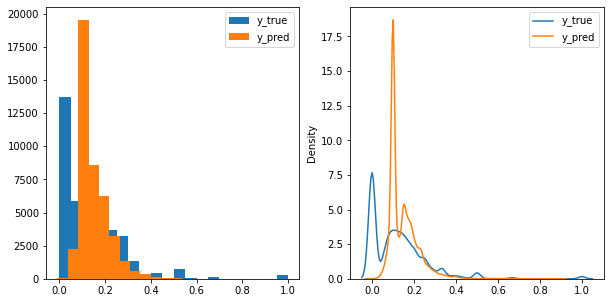

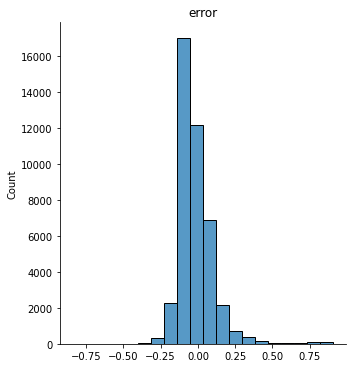

In [16]:
ltr_metrics.show_metrics('validation')